In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time

In [2]:
def get_product_info(c):
    for name in products.find_all('a',class_='absolute-link product-link'):
        Category.append(c)
        Name.append(name.get('title'))

    for price in products.find_all('div',class_='product-price-top'):
        original_price=''
        if price.find(class_='price'):
            original_price=price.find(class_='price').text
            Price.append(float(original_price.replace('\nAU$','').replace('\n','')))
        
        elif price.find(class_='price-olp'):
            original_price=price.find(class_='price-olp').text
            Price.append(float(original_price.replace('\nAU$','').replace('\n',''))) 
        
        else:
            Price.append(np.nan)

    for rating in products.find_all('div',class_='product-inner product-inner-wide'):
        if rating.find('a',class_='rating-count'):
            Rating.append(float(rating.find('a',class_='rating-count').get('title').split()[0].split('/')[0]))
            Reviews.append(int(rating.find('a',class_='rating-count').get('title').split()[2]))
        else:
            Rating.append(np.nan)
            Reviews.append(np.nan)
    

In [3]:
Price = []
Name = []
Rating = []
Reviews =[]
Category = []
cate = ['supplements','sports-nutrition', 'bath-personal-care', 'beauty','grocery', 'baby-kids','pets','healthy-home']

In [4]:
for c in cate:
    for page in range(1,36):
        if page >3 and c =='pets':
            continue;
        url = "https://au.iherb.com/c/{}?p={}"
        page_url = url.format(c,page)
        print(page_url)
        response = requests.get(page_url)
        Cpage = response.text
        soup = BeautifulSoup(Cpage, "lxml")
        products = soup.find('div',class_='products clearfix')
        get_product_info(c)

https://au.iherb.com/c/supplements?p=1
https://au.iherb.com/c/supplements?p=2
https://au.iherb.com/c/supplements?p=3
https://au.iherb.com/c/supplements?p=4
https://au.iherb.com/c/supplements?p=5
https://au.iherb.com/c/supplements?p=6
https://au.iherb.com/c/supplements?p=7
https://au.iherb.com/c/supplements?p=8
https://au.iherb.com/c/supplements?p=9
https://au.iherb.com/c/supplements?p=10
https://au.iherb.com/c/supplements?p=11
https://au.iherb.com/c/supplements?p=12
https://au.iherb.com/c/supplements?p=13
https://au.iherb.com/c/supplements?p=14
https://au.iherb.com/c/supplements?p=15
https://au.iherb.com/c/supplements?p=16
https://au.iherb.com/c/supplements?p=17
https://au.iherb.com/c/supplements?p=18
https://au.iherb.com/c/supplements?p=19
https://au.iherb.com/c/supplements?p=20
https://au.iherb.com/c/supplements?p=21
https://au.iherb.com/c/supplements?p=22
https://au.iherb.com/c/supplements?p=23
https://au.iherb.com/c/supplements?p=24
https://au.iherb.com/c/supplements?p=25
https://a

In [5]:
len(Name)

5950

In [6]:
len(Rating)

5950

In [7]:
len(Reviews)

5950

In [8]:
len(Price)

5950

In [9]:
len(Category)

5950

In [11]:
import re
Size = [] 
cn=0
c=0
for n in Name:
    m = re.search('([\d.]+)\s+(mg|g|kg)', n)
    if m is None:
        Size.append(np.nan)
        cn +=1
    else:
        Size.append(m.group(0))
        c+=1

In [12]:
Size

['000 mg',
 nan,
 '206 g',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '50 mg',
 '464 g',
 '250 mg',
 nan,
 nan,
 nan,
 '200 mg',
 nan,
 '50 mg',
 '50 mg',
 nan,
 '500 mg',
 nan,
 '25 mg',
 nan,
 nan,
 nan,
 nan,
 '227 g',
 nan,
 '950 mg',
 nan,
 nan,
 '36 mg',
 nan,
 '500 mg',
 '400 mg',
 '000 mg',
 '85 g',
 nan,
 nan,
 '50 mg',
 '500 mg',
 '20 mg',
 '500 mg',
 '000 mg',
 '000 mg',
 '950 mg',
 nan,
 nan,
 '000 mg',
 '8.5 g',
 nan,
 nan,
 '50 mg',
 nan,
 '120 mg',
 '50 mg',
 '500 mg',
 nan,
 '250 mg',
 nan,
 nan,
 '595 mg',
 nan,
 nan,
 '3 mg',
 nan,
 nan,
 '20 mg',
 '500 mg',
 '300 mg',
 '500 mg',
 '500 mg',
 nan,
 '200 mg',
 '100 mg',
 nan,
 nan,
 '600 mg',
 '400 mg',
 nan,
 '5 mg',
 '400 mg',
 nan,
 nan,
 nan,
 '9.4 g',
 '36 mg',
 nan,
 '000 mg',
 nan,
 nan,
 '300 mg',
 nan,
 nan,
 '8.5 g',
 '120 mg',
 nan,
 '50 mg',
 nan,
 nan,
 '500 mg',
 nan,
 '100 mg',
 nan,
 nan,
 nan,
 nan,
 '2.27 kg',
 nan,
 nan,
 '500 mg',
 '200 mg',
 nan,
 nan,
 nan,
 '180

In [13]:
print(c,cn)

2694 3256


In [14]:
for idx, s in enumerate(Size):
    if 'kg' in str(s):
        Size[idx] = float(s.replace('kg',''))*1000.0
    elif 'mg' in str(s):
        Size[idx] = float(s.replace('mg',''))/1000.0
    elif 'g' in str(s):
        Size[idx] = float(s.replace('g',''))

In [15]:
Size

[0.0,
 nan,
 206.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.05,
 464.0,
 0.25,
 nan,
 nan,
 nan,
 0.2,
 nan,
 0.05,
 0.05,
 nan,
 0.5,
 nan,
 0.025,
 nan,
 nan,
 nan,
 nan,
 227.0,
 nan,
 0.95,
 nan,
 nan,
 0.036,
 nan,
 0.5,
 0.4,
 0.0,
 85.0,
 nan,
 nan,
 0.05,
 0.5,
 0.02,
 0.5,
 0.0,
 0.0,
 0.95,
 nan,
 nan,
 0.0,
 8.5,
 nan,
 nan,
 0.05,
 nan,
 0.12,
 0.05,
 0.5,
 nan,
 0.25,
 nan,
 nan,
 0.595,
 nan,
 nan,
 0.003,
 nan,
 nan,
 0.02,
 0.5,
 0.3,
 0.5,
 0.5,
 nan,
 0.2,
 0.1,
 nan,
 nan,
 0.6,
 0.4,
 nan,
 0.005,
 0.4,
 nan,
 nan,
 nan,
 9.4,
 0.036,
 nan,
 0.0,
 nan,
 nan,
 0.3,
 nan,
 nan,
 8.5,
 0.12,
 nan,
 0.05,
 nan,
 nan,
 0.5,
 nan,
 0.1,
 nan,
 nan,
 nan,
 nan,
 2270.0,
 nan,
 nan,
 0.5,
 0.2,
 nan,
 nan,
 nan,
 0.18,
 0.5,
 0.05,
 0.025,
 nan,
 227.0,
 nan,
 nan,
 454.0,
 nan,
 nan,
 170.0,
 nan,
 0.5,
 nan,
 454.0,
 nan,
 1.0,
 0.5,
 nan,
 nan,
 nan,
 0.1,
 0.1,
 nan,
 0.0,
 nan,
 0.03,
 nan,
 0.5,
 0.1,
 nan,
 0.003,
 0.5,
 0.4,


In [16]:
tuples = list(zip(Name,Price,Reviews,Size,Category,Rating))
df = pd.DataFrame(tuples, columns=['Name','Price','Reviews','Size','Category','Rating'])
df

,Name,Price,Reviews,Size,Category,Rating
0,"California Gold Nutrition, Gold C, Vitamin C, ...",5.46,122093.0,0.0,supplements,4.8
1,"California Gold Nutrition, Vitamin D3, 125 mcg...",14.61,80991.0,NaN,supplements,4.9
2,"California Gold Nutrition, CollagenUP, Marine ...",26.53,88798.0,206.0,supplements,4.7
3,"Now Foods, Vitamin D-3, 125 mcg (5,000 IU), 12...",9.62,113560.0,NaN,supplements,4.9
4,"California Gold Nutrition, Baby Vitamin D3 Liq...",8.74,55969.0,NaN,supplements,4.9
...,...,...,...,...,...,...
5945,"Therapy Clean, Glass Cooktop, Cleaner & Polish...",15.53,NaN,NaN,healthy-home,NaN
5946,"Therapy Clean, Tub & Tile, Cleaner & Polish wi...",15.53,NaN,NaN,healthy-home,NaN
5947,"BCL, Be Care Love, 100% Pure Essential Oil, Eu...",25.36,2.0,NaN,healthy-home,4.5
5948,"Caboo, Bamboo Napkins, 250 Paper Napkins",8.83,NaN,NaN,healthy-home,NaN


In [17]:
df.to_csv('iHerb_products.csv',index=False)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

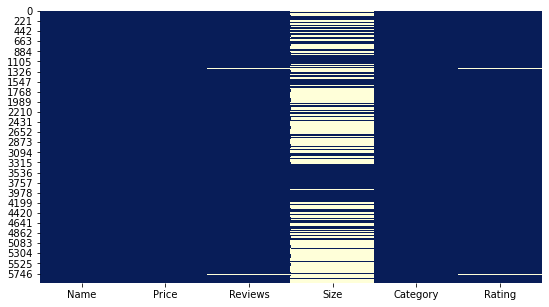

In [19]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")#check if there is any null values
plt.show()

In [20]:
df.dropna(inplace=True)

In [21]:
df.reset_index(drop=True,inplace=True)

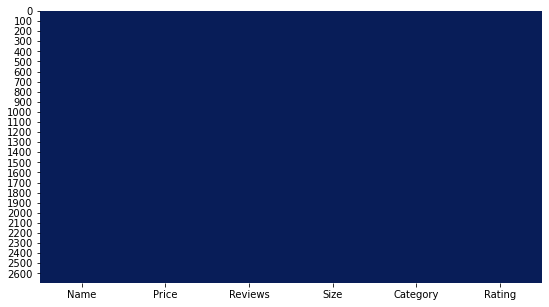

In [22]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")#check if there is any null values
plt.show()

<AxesSubplot:ylabel='Category'>

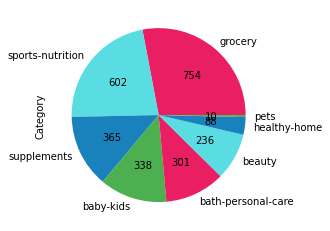

In [23]:
states = df['Category'].value_counts()
colors = ['#e91e63','#59dce2','#1982bc','#4caf50']
states.plot.pie(autopct=lambda x: '{:.0f}'.format(x*states.sum()/100), colors = colors )

In [24]:
df

,Name,Price,Reviews,Size,Category,Rating
0,"California Gold Nutrition, Gold C, Vitamin C, ...",5.46,122093.0,0.00,supplements,4.8
1,"California Gold Nutrition, CollagenUP, Marine ...",26.53,88798.0,206.00,supplements,4.7
2,"21st Century, Zinc Citrate, 50 mg, 60 Tablets",3.12,4414.0,0.05,supplements,4.8
3,"California Gold Nutrition, CollagenUP, Marine ...",54.62,88798.0,464.00,supplements,4.7
4,"Sports Research, Omega-3 Fish Oil, Triple Stre...",35.04,23531.0,0.25,supplements,4.7
...,...,...,...,...,...,...
2689,"Seventh Generation, Laundry Detergent Packs, C...",45.73,8.0,1500.00,healthy-home,4.5
2690,"29 St. Honore, Savon Parfume 1779, White Musk,...",14.05,60.0,135.00,healthy-home,4.1
2691,"29 St. Honore, Savon Parfume 1779, Roses & Bai...",8.43,45.0,135.00,healthy-home,4.3
2692,"Sai Baba, Super Hit Incense, 15 g",3.12,1396.0,15.00,healthy-home,4.5


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2694 non-null   object 
 1   Price     2694 non-null   float64
 2   Reviews   2694 non-null   float64
 3   Size      2694 non-null   float64
 4   Category  2694 non-null   object 
 5   Rating    2694 non-null   float64
dtypes: float64(4), object(2)
memory usage: 126.4+ KB


In [26]:
df_ = df['Category']

In [27]:
df_

0        supplements
1        supplements
2        supplements
3        supplements
4        supplements
            ...     
2689    healthy-home
2690    healthy-home
2691    healthy-home
2692    healthy-home
2693    healthy-home
Name: Category, Length: 2694, dtype: object

In [28]:
set(df_)

{'baby-kids',
 'bath-personal-care',
 'beauty',
 'grocery',
 'healthy-home',
 'pets',
 'sports-nutrition',
 'supplements'}

In [29]:
df_=pd.get_dummies(df_, drop_first=True,)

In [30]:
df_.shape

(2694, 7)

In [31]:
df_

,bath-personal-care,beauty,grocery,healthy-home,pets,sports-nutrition,supplements
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
2689,0,0,0,1,0,0,0
2690,0,0,0,1,0,0,0
2691,0,0,0,1,0,0,0
2692,0,0,0,1,0,0,0


In [32]:
#df.drop('Category',axis=1, inplace=True)

In [33]:
df

,Name,Price,Reviews,Size,Category,Rating
0,"California Gold Nutrition, Gold C, Vitamin C, ...",5.46,122093.0,0.00,supplements,4.8
1,"California Gold Nutrition, CollagenUP, Marine ...",26.53,88798.0,206.00,supplements,4.7
2,"21st Century, Zinc Citrate, 50 mg, 60 Tablets",3.12,4414.0,0.05,supplements,4.8
3,"California Gold Nutrition, CollagenUP, Marine ...",54.62,88798.0,464.00,supplements,4.7
4,"Sports Research, Omega-3 Fish Oil, Triple Stre...",35.04,23531.0,0.25,supplements,4.7
...,...,...,...,...,...,...
2689,"Seventh Generation, Laundry Detergent Packs, C...",45.73,8.0,1500.00,healthy-home,4.5
2690,"29 St. Honore, Savon Parfume 1779, White Musk,...",14.05,60.0,135.00,healthy-home,4.1
2691,"29 St. Honore, Savon Parfume 1779, Roses & Bai...",8.43,45.0,135.00,healthy-home,4.3
2692,"Sai Baba, Super Hit Incense, 15 g",3.12,1396.0,15.00,healthy-home,4.5


In [34]:
iHerb=pd.concat([df, df_],axis=1)

In [35]:
iHerb.to_csv('iHerb.csv',index=False)

In [36]:
iHerb2=iHerb.copy()

In [37]:
iHerb2

,Name,Price,Reviews,Size,Category,Rating,bath-personal-care,beauty,grocery,healthy-home,pets,sports-nutrition,supplements
0,"California Gold Nutrition, Gold C, Vitamin C, ...",5.46,122093.0,0.00,supplements,4.8,0,0,0,0,0,0,1
1,"California Gold Nutrition, CollagenUP, Marine ...",26.53,88798.0,206.00,supplements,4.7,0,0,0,0,0,0,1
2,"21st Century, Zinc Citrate, 50 mg, 60 Tablets",3.12,4414.0,0.05,supplements,4.8,0,0,0,0,0,0,1
3,"California Gold Nutrition, CollagenUP, Marine ...",54.62,88798.0,464.00,supplements,4.7,0,0,0,0,0,0,1
4,"Sports Research, Omega-3 Fish Oil, Triple Stre...",35.04,23531.0,0.25,supplements,4.7,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,"Seventh Generation, Laundry Detergent Packs, C...",45.73,8.0,1500.00,healthy-home,4.5,0,0,0,1,0,0,0
2690,"29 St. Honore, Savon Parfume 1779, White Musk,...",14.05,60.0,135.00,healthy-home,4.1,0,0,0,1,0,0,0
2691,"29 St. Honore, Savon Parfume 1779, Roses & Bai...",8.43,45.0,135.00,healthy-home,4.3,0,0,0,1,0,0,0
2692,"Sai Baba, Super Hit Incense, 15 g",3.12,1396.0,15.00,healthy-home,4.5,0,0,0,1,0,0,0


<AxesSubplot:>

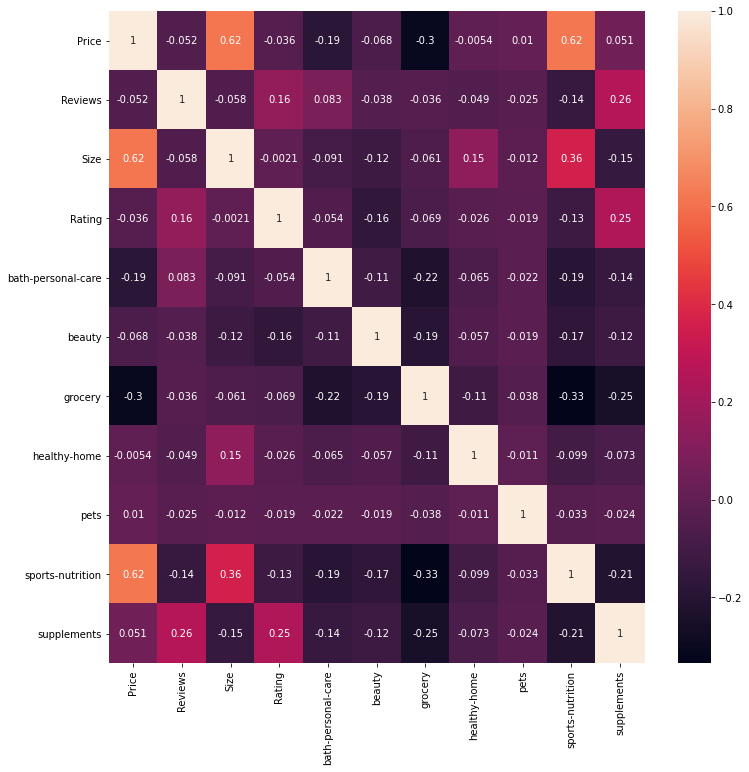

In [38]:
corr = iHerb.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot = True)

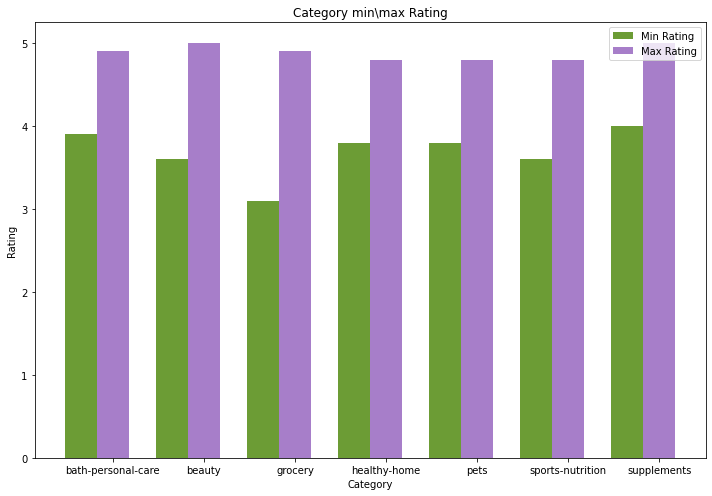

In [39]:
Categories=['bath-personal-care',
 'beauty',
 'grocery',
 'healthy-home',
 'pets',
 'sports-nutrition',
 'supplements']
Product_min_Rating=[]
Product_max_Rating=[]

for cate in Categories:
    Product_max_Rating.append(max(iHerb[iHerb['Category']== cate]['Rating']))
    Product_min_Rating.append(min(iHerb[iHerb['Category']== cate]['Rating']))
    
months = iHerb['Category']
n_groups = 7
means_frank = Product_min_Rating
means_guido = Product_max_Rating

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='#478402',
label='Min Rating')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='#915ebc',
label='Max Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Category min\max Rating')


plt.xticks(index + bar_width,Categories)

plt.legend()
plt.tight_layout()
plt.show()

/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 89.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fatimahalshammari/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/f

<AxesSubplot:xlabel='Product_Category', ylabel='Product_Rating'>

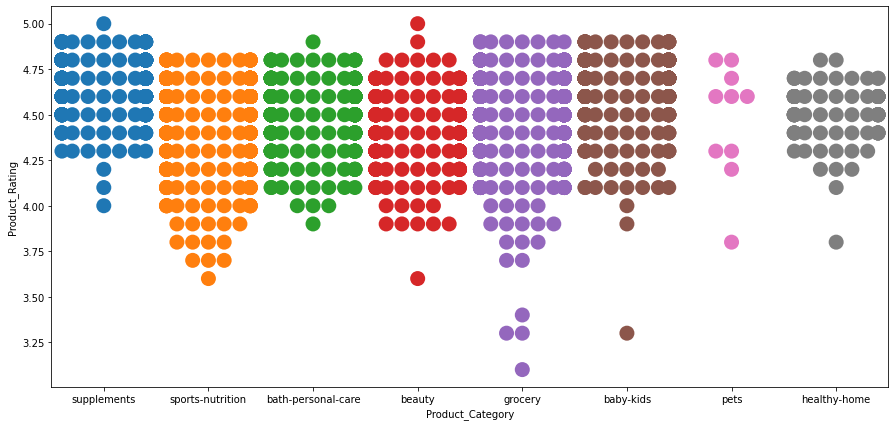

In [40]:
Product_Category=iHerb['Category']
Product_Rating=iHerb['Rating']
    
newData = pd.DataFrame({
    'Product_Category':Product_Category,
    'Product_Rating':Product_Rating
})
fig, ax = plt.subplots(figsize=(15,7))
sns.swarmplot(x="Product_Category", y="Product_Rating", data=newData,size=15)


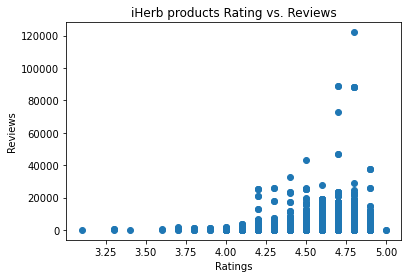

In [41]:
plt.scatter(iHerb['Rating'], iHerb['Reviews'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('iHerb products Rating vs. Reviews')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.show()

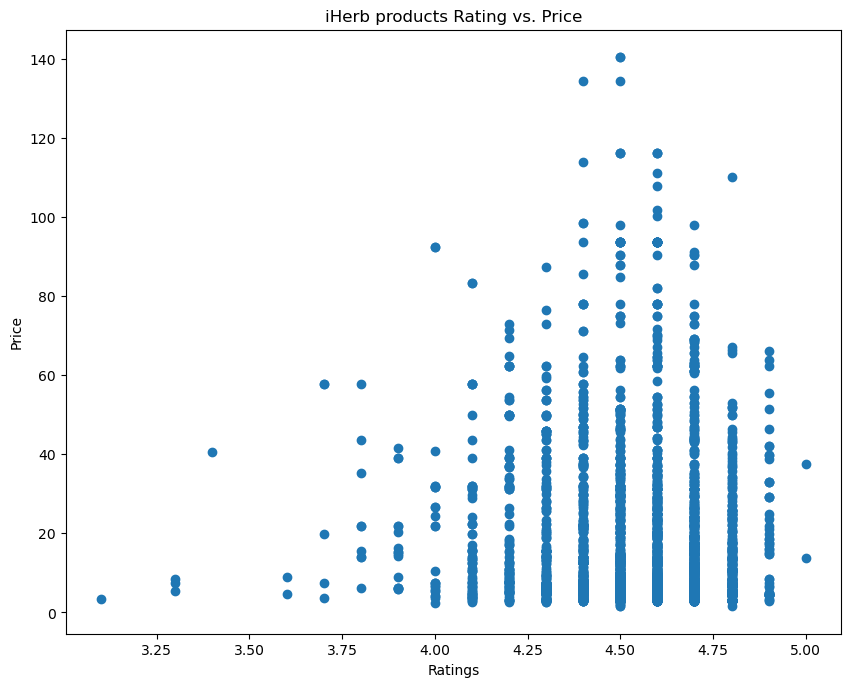

In [42]:
plt.scatter(iHerb['Rating'], iHerb['Price'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('iHerb products Rating vs. Price')
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()

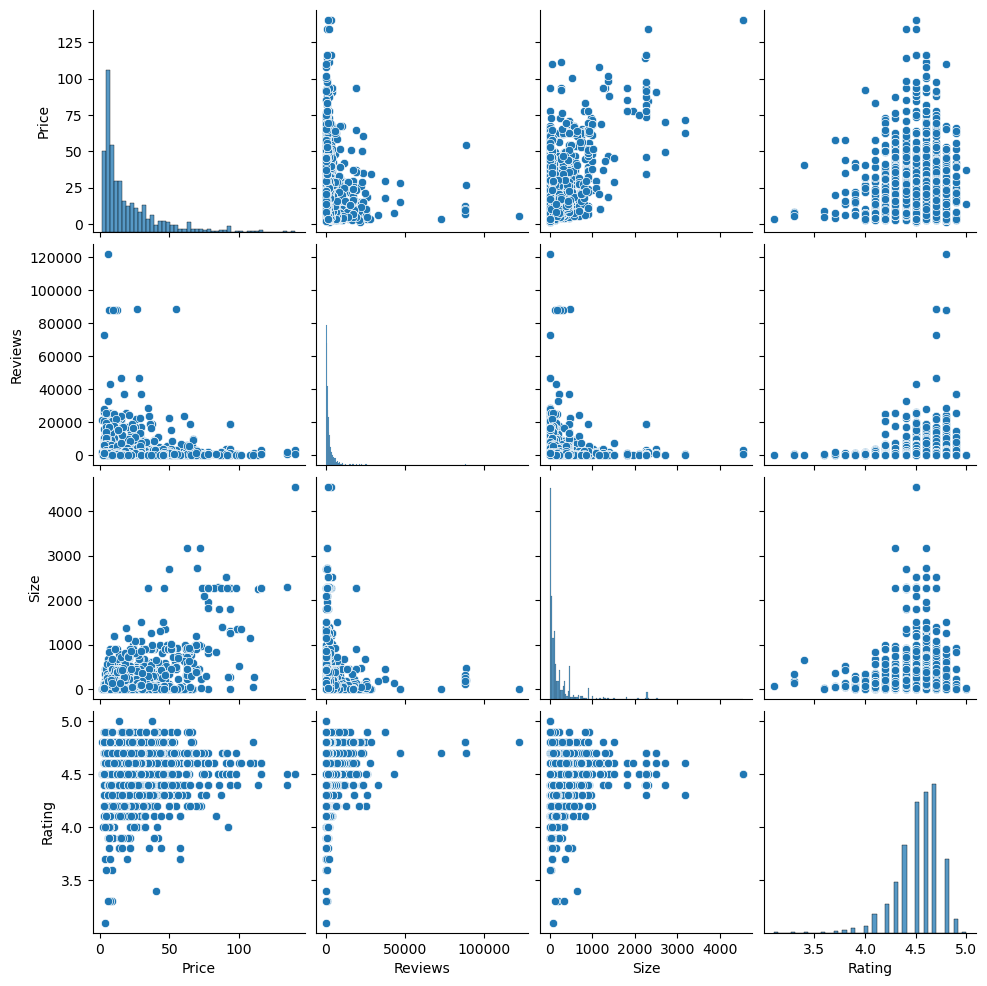

In [43]:
sns.pairplot(df)

In [44]:
df.describe()

,Price,Reviews,Size,Rating
count,2694.000000,2694.000000,2694.000000,2694.000000
mean,19.664369,2855.880475,214.096207,4.535969
std,20.094926,6582.836046,402.035548,0.210903
min,1.560000,1.000000,0.000000,3.100000
25%,6.230000,416.250000,18.000000,4.400000
50%,11.900000,1052.000000,78.000000,4.600000
75%,26.520000,2694.000000,227.000000,4.700000
max,140.440000,122093.000000,4540.000000,5.000000


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [52]:
X_train, X_test, y_train, y_test = train_test_split(iHerb[[ 'Rating', 'Reviews', 'Size', 
       'bath-personal-care', 'beauty', 'grocery', 'healthy-home', 'pets',
       'sports-nutrition', 'supplements']], iHerb[['Price']], test_size=0.3, random_state=42)
print("Training Data has",X_train.shape)
print("Testing Data has",X_test.shape)

Training Data has (1885, 10)
Testing Data has (809, 10)


In [53]:
list_models=[]
list_scores=[]
list_errors=[]
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_1=lr.predict(X_test)
score_1=r2_score(y_test,pred_1)
error_1=mean_squared_error(y_test,pred_1)
list_models.append('linear regression')
list_scores.append(score_1)
list_errors.append(error_1)
print("training accuracy: ",r2_score(y_train,lr.predict(X_train)) )
print("training error: ",1-r2_score(y_train,lr.predict(X_train)) )
print("testing accuracy: ",r2_score(y_test,lr.predict(X_test)) )
print("testing error: ",1-r2_score(y_test,lr.predict(X_test)) )

training accuracy:  0.6343976862597044
training error:  0.3656023137402956
testing accuracy:  0.597785395651838
testing error:  0.40221460434816203


In [54]:
lr.coef_

array([[-2.42132049e+00, -1.06615519e-05,  2.40199701e-02,
        -8.40339941e-01,  7.00429469e+00, -1.54422861e+00,
        -9.20492144e-01,  1.43209540e+01,  2.47769387e+01,
         1.47241417e+01]])

In [55]:
lr.intercept_

array([18.04116801])

In [56]:
error_1*100

15713.948188519853

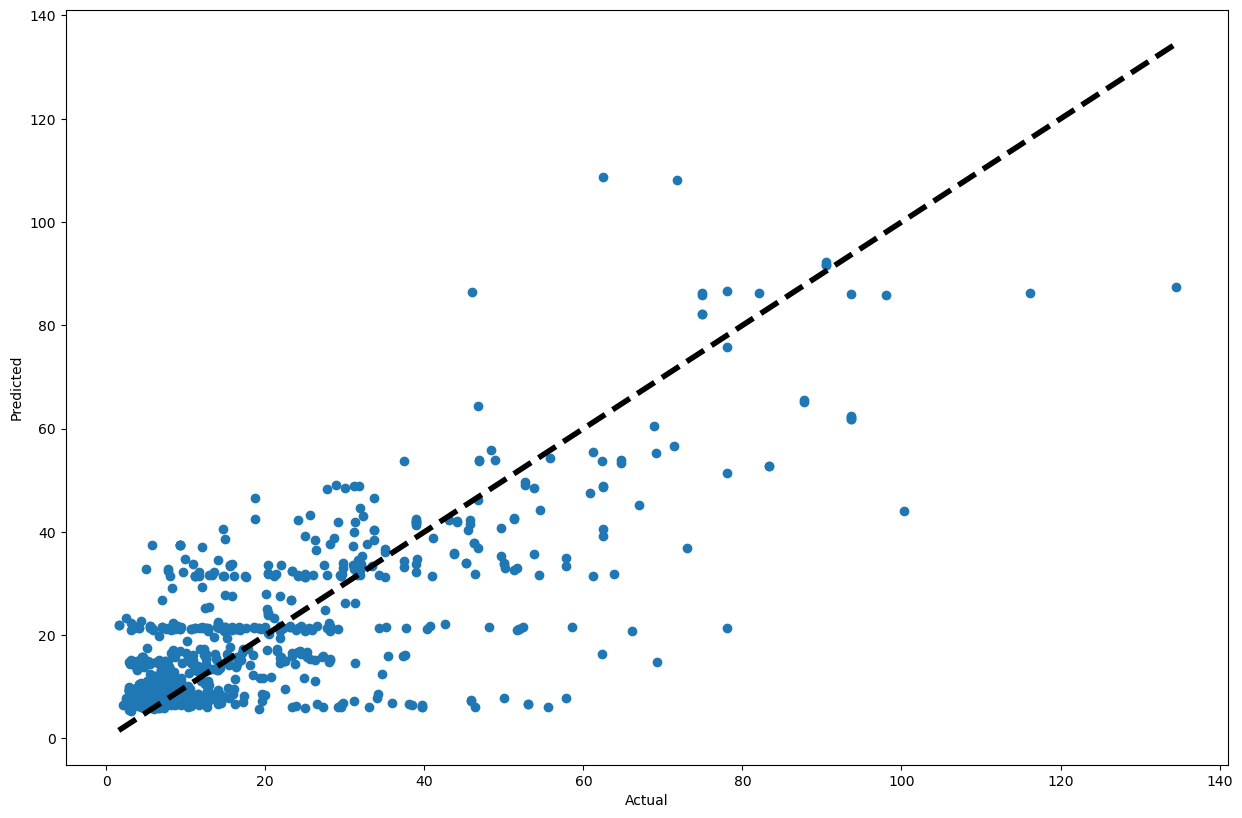

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_test, pred_1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#plt.yticks(np.arange(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))

plt.show()

In [58]:
iHerb.columns

Index(['Name', 'Price', 'Reviews', 'Size', 'Category', 'Rating',
       'bath-personal-care', 'beauty', 'grocery', 'healthy-home', 'pets',
       'sports-nutrition', 'supplements'],
      dtype='object')

In [59]:
iHerb.rename(columns={'bath-personal-care': 'bathAndPersonalAndCare', 'healthy-home': 'healthyHome', 'sports-nutrition':'sportsAndNutrition'}, inplace=True)

In [60]:
# fit model with target as housing price index
import statsmodels.api as sm

housing_model = sm.OLS(y_train, X_train, data=df)

results = housing_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              811.1
Date:                Thu, 23 Sep 2021   Prob (F-statistic):                        0.00
Time:                        11:02:07   Log-Likelihood:                         -7398.4
No. Observations:                1885   AIC:                                  1.482e+04
Df Residuals:                    1875   BIC:                                  1.487e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Rating                 1.4238      0.173      8.222      0.000       1.084       1.763
Reviews             -2.13e-05   4.25e-05     -0.501      0.616      -0.000    6.21e-05
Size                   0.0239      0.001     30.928      0.000       0.022       0.025
bath-personal-care    -0.0734      1.156     -0.063      0.949      -2.341       2.194
beauty                 8.0263      1.227      6.544      0.000       5.621      10.432
grocery               -0.7925      0.941     -0.842      0.400      -2.639       1.054
healthy-home          -0.0860      1.717     -0.050      0.960      -3.453       3.281
pets                  15.3025      4.707      3.251      0.001       6.071      24.534
sports-nutrition      25.6743      1.019     25.197      0.000      23.676      27.673
supplements           14.8864      1.134     13.131      0.000      12.663      17.110
==============================================================================
Omnibus:                      666.205   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3667.692
Skew:                           1.564   Prob(JB):                         0.00
Kurtosis:                       9.076   Cond. No.                     1.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
import statsmodels.formula.api as smf
SMF_model = smf.ols('Price ~ Rating+ Reviews+Size + bathAndPersonalAndCare + beauty + grocery + healthyHome + pets + sportsAndNutrition + supplements', data=iHerb).fit()

In [62]:
print(SMF_model.rsquared)

0.6244825013153483


In [63]:
SMF_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     446.2
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:02:08   Log-Likelihood:                -10586.
No. Observations:                2694   AIC:                         2.119e+04
Df Residuals:                    2683   BIC:                         2.126e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 16.2352      5.695      2.851      0.004       5.068      27.402
Rating                    -1.8708      1.219     -1.534      0.125      -4.262       0.520
Reviews                -3.071e-05    3.8e-05     -0.808      0.419      -0.000    4.38e-05
Size                       0.0239      0.001     36.514      0.000       0.023       0.025
bathAndPersonalAndCare    -1.2795      1.000     -1.279      0.201      -3.241       0.682
beauty                     5.8655      1.080      5.429      0.000       3.747       7.984
grocery                   -2.0126      0.828     -2.432      0.015      -3.635      -0.390
healthyHome               -1.5482      1.517     -1.020      0.308      -4.523       1.427
pets                      11.8237      3.965      2.982      0.003       4.049      19.598
sportsAndNutrition        23.6147      0.903     26.158      0.000      21.845      25.385
supplements               13.4034      0.953     14.057      0.000      11.534      15.273
==============================================================================
Omnibus:                      891.867   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4351.932
Skew:                           1.507   Prob(JB):                         0.00
Kurtosis:                       8.448   Cond. No.                     1.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(X_train,y_train)
pred_2=rfg.predict(X_test)
score_2=r2_score(y_test,pred_2)
error_2=mean_squared_error(y_test,pred_2)
list_models.append('randomforest')
list_scores.append(score_2)
list_errors.append(error_2)
print("training accuracy: ",r2_score(y_train,rfg.predict(X_train)) )
print("training error: ",1-r2_score(y_train,rfg.predict(X_train)) )
print("testing accuracy: ",r2_score(y_test,rfg.predict(X_test)) )
print("testing error: ",1-r2_score(y_test,rfg.predict(X_test)) )

training accuracy:  0.9565481803174858
training error:  0.043451819682514214
testing accuracy:  0.7284150373030842
testing error:  0.2715849626969158
